<a href="https://colab.research.google.com/github/IhorBoichuk/Become-A-Developer-2023/blob/master/Copy_of_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading data
data = pd.read_csv('train.csv') #Please remember to use correct path to your train file!
# Dropping missing data
data.dropna(inplace=True)

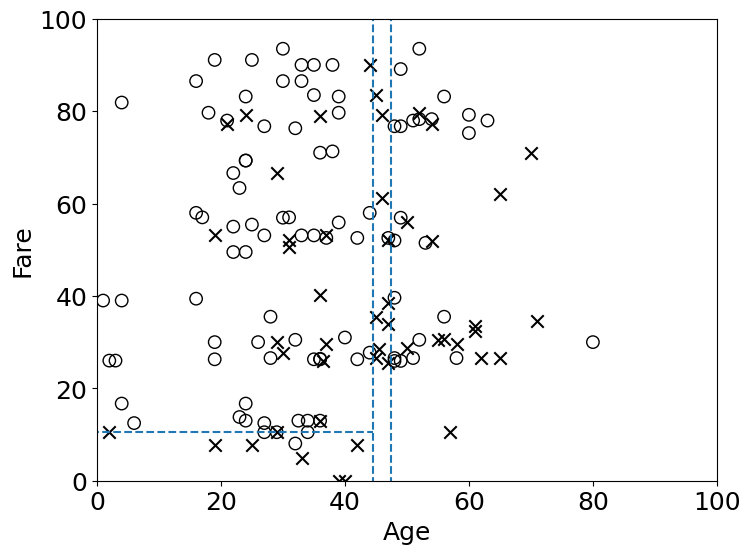

In [4]:
# Creating our plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data[data.Survived == 0].Age, data[data.Survived == 0].Fare, s=80, marker='x', color='black')
ax.scatter(data[data.Survived == 1].Age, data[data.Survived == 1].Fare, s=80, facecolors='none', edgecolors='black')

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Fare', fontsize=18)

# Decision tree trained by Oleksandr
#plt.hlines(y=50, xmin=-8, xmax=150, linestyles='dashed')
#plt.vlines(x=20, ymin=-8, ymax=50, linestyles='dashed')

# Decision tree trained by sklearn
plt.vlines(x=44.5, ymin=-8, ymax=500, linestyles='dashed')
plt.hlines(y=10.5, xmin=-8, xmax=44.5, linestyles='dashed')
plt.vlines(x=47.5, ymin=-8, ymax=500, linestyles='dashed')

# Checking to which classes those (new) observations will be assigned
#ax.scatter(0.5, 6.1, s=100, edgecolors='red', facecolors='red')
#ax.scatter(7, 3.5,   s=100, edgecolors='red', facecolors='red')

plt.show()

In [23]:
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, ccp_alpha=0.019)
# Training, aka fitting our model to the data
tree.fit(data.loc[:, ['Age', 'Fare']], data.Survived) #It's just an example - please try out different variables!
# Predicting to see how well our tree trained itself
predictions = tree.predict(data.loc[:, ['Age', 'Fare']])
# Remember that in order to get proper performance estimates you need to use cross-validation or train-test split,
#   please check: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
# Reading the confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
confusion_matrix(data.Survived, predictions)

array([[ 18,  42],
       [  2, 121]])

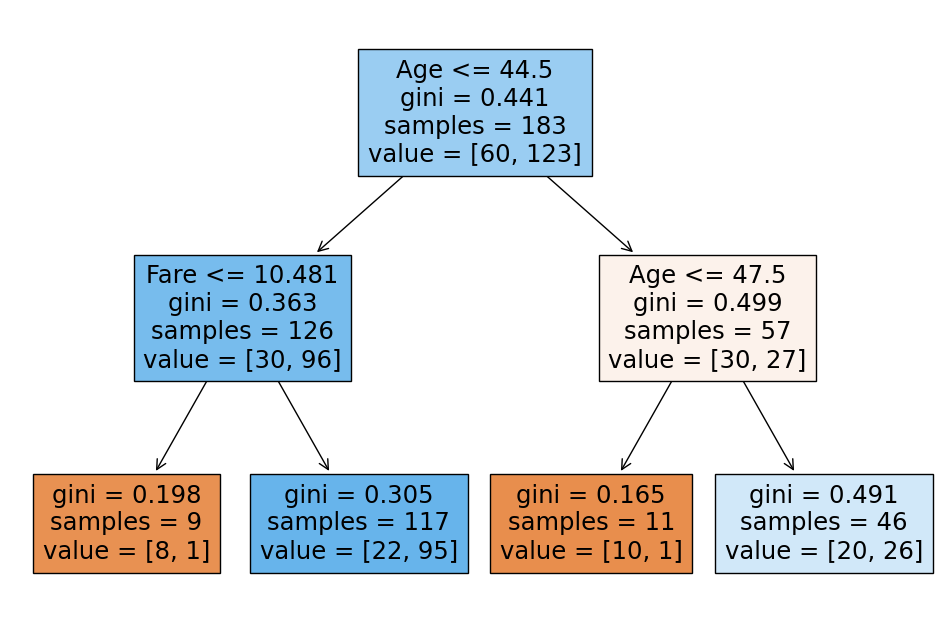

In [25]:
# Creating a plot of our model
plt.subplots(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=['Age', 'Fare'])
plt.show()

In [8]:
# Random Forests use bootstrap samples
data_sample = data.iloc[np.random.randint(0, len(data), size=len(data))]

Text(0, 0.5, 'Fare')

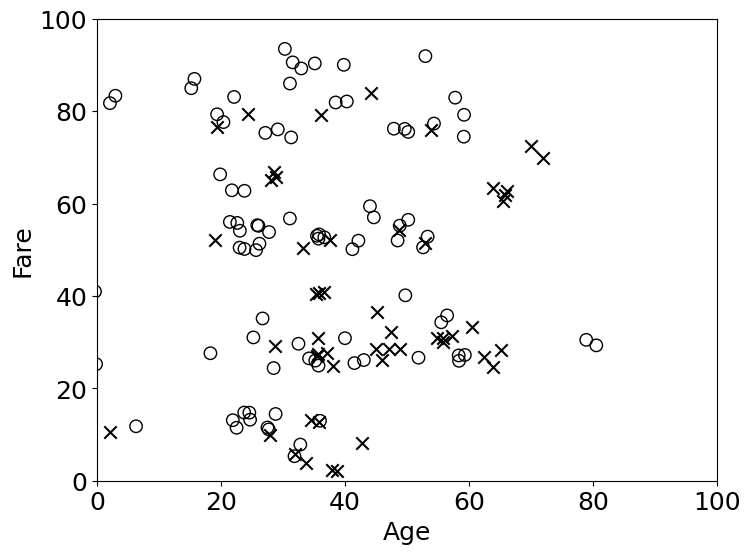

In [9]:
# Creating our plot
data_sample = data.iloc[np.random.randint(0, len(data), size=len(data))]

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data_sample[data_sample.Survived == 0].Age + np.random.normal(size=len(data_sample[data_sample.Survived == 0])),
           data_sample[data_sample.Survived == 0].Fare + np.random.normal(size=len(data_sample[data_sample.Survived == 0])),
           s=80, marker='x', color='black')
ax.scatter(data_sample[data_sample.Survived == 1].Age + np.random.normal(size=len(data_sample[data_sample.Survived == 1])),
           data_sample[data_sample.Survived == 1].Fare + np.random.normal(size=len(data_sample[data_sample.Survived == 1])),
           s=80, facecolors='none', edgecolors='black')

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Fare', fontsize=18)

# Adding segments to indicate splits
# TODO

# Checking to which classes those (new) observations will be assigned
#ax.scatter(0.5, 6.1, s=100, edgecolors='red', facecolors='red')
#ax.scatter(7, 3.5,   s=100, edgecolors='red', facecolors='red')


In [10]:
# This is a "stack"-based implementation of a decision tree

from __future__ import annotations
from typing import Any, NoReturn
import numpy as np


def attrgetter(obj: object, name: str, value: Any = None) -> Any:
    """
    Returns value from nested objects/chained attributes (basically, getattr() on steroids)
    :param obj: Primary object
    :param name: Path to an attribute (dot separated)
    :param value: Default value returned if a function fails to find the requested attribute value
    :return:
    """
    for attribute in name.split('.'):
        obj = getattr(obj, attribute, value)
    return obj


def attrsetter(obj: object, name: str, value: Any) -> NoReturn:
    """
    Sets the value of an attribute of a (nested) object (basically, setattr() on steroids)
    :param obj: Primary object
    :param name: Path to an attribute (dot separated)
    :param value: Value to be set
    """
    pre, _, post = name.rpartition('.')
    setattr(attrgetter(obj, pre) if pre else obj, post, value)


class Node:
    """
    Building block of each tree
    May contain children nodes (left and right) or be a final node (called "leaf")
    """
    def __init__(self, data: np.ndarray = None, target: np.ndarray = None, left: Node = None, right: Node = None,
                 curr_depth: int = None, variable: int = None, threshold: float = None, leaf_value: np.ndarray = None) -> NoReturn:
        """
        :param data: NxM (where N denotes #observations and M denotes #variables) numpy array containing independent variables
        :param target: numpy vector containing dependent variable
        :param left: (if exists) node containing observations smaller than a given threshold for a given variable
        :param right: (if exists) node containing observations bigger than a given threshold for a given variable
        :param curr_depth: number of parent nodes directly above the current node
        :param variable: variable used to split data
        :param threshold: threshold at which data was split
        :param leaf_value: (if a node is a leaf, i.e. a final node with no children) the most frequent value(s) of a
                           dependent variable in a given node
        """
        self.data = data
        self.target = target
        self.left = left
        self.right = right
        self.curr_depth = curr_depth
        self.variable = variable
        self.threshold = threshold
        self.leaf_value = leaf_value

    def __str__(self) -> str:
        return f'This node is at level: {self.curr_depth}'


class DecisionTree:


    """
    Classification decision tree
    Data must be provided on instance creation, then fit() can be used to fit the tree to the data and
    predict() to predict classes of the new data samples
    """
    def __init__(self, max_depth: int = 3, criterion='entropy') -> NoReturn:
        """
        :param max_depth: maximum depth of a tree
        """
        self.max_depth = max_depth
        self.root = Node()
        self.fitted_depth = 0
        self.criterion = criterion

    def __str__(self) -> str:
        if self.fitted_depth == 0:
            return 'This tree is still a sapling. There\'s nothing to show'
        else:
            s = f'Tree with max fitted depth of {self.fitted_depth}:\n'
            s += f'root ::: Split at variable {self.root.variable} at {self.root.threshold}\n'
            stack = ['left', 'right']
            while stack:
                name = stack.pop()
                curr_depth = name.count('.') + 2
                if attrgetter(self.root, f'{name}.variable'):
                    s += f"{' ' * curr_depth}{name} ::: Split at variable {attrgetter(self.root, f'{name}.variable')} at " \
                         f"{attrgetter(self.root, f'{name}.threshold')} (" \
                         f"{np.unique(attrgetter(self.root, f'{name}.target'), return_counts=True)[1]})\n"
                else:
                    s += f"{' ' * curr_depth}{name} ({np.unique(attrgetter(self.root, f'{name}.target'), return_counts=True)[1]}" \
                         f" and the leaf value is {attrgetter(self.root, f'{name}.leaf_value')})\n"
                if attrgetter(self.root, f'{name}.left'):
                    stack.append(f'{name}.left')
                if attrgetter(self.root, f'{name}.right'):
                    stack.append(f'{name}.right')
            return s

    @staticmethod
    def entropy(x: np.ndarray) -> float:
        """
        Entropy, as defined in information theory (https://en.wikipedia.org/wiki/Entropy_(information_theory))
        :param x: vector of real values
        :return: entropy of a vector x
        """

        if x.size == 0:
            return 0
        else:
            counts = np.unique(x, return_counts=True)[1]


            norm_counts = counts / counts.sum()
            return -(norm_counts * np.log(norm_counts)).sum()


    def information_gain(self, parent: np.ndarray, left_child: np.ndarray, right_child: np.ndarray) -> float:
        """
        Information gain, as defined on Wikipedia (https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)
        :param parent: float vector
        :param left_child: float vector
        :param right_child: float vector
        :return: float denoting information gain for a given split (parent into its children)
        """

        return self.entropy(parent) - (left_child.size / parent.size * self.entropy(left_child) +
                                       right_child.size / parent.size * self.entropy(right_child))


    @staticmethod
    def gini(x: np.ndarray) -> float:
        """
        Gini index, as defined in information theory (https://en.wikipedia.org/wiki/Gini_coefficient_(information_theory))
        :param x: vector of real values
        :return: float denoting index gain
        """

        norm_counts = 0
        if x.size == 0:

            return 0
        else:
            counts = np.unique(x, return_counts=True)[1]

            for i in range(len(counts)):
              norm_counts += (counts[i] / counts.sum())**2
            return 1 - norm_counts




    def gini_index(self, parent: np.ndarray, left_child: np.ndarray, right_child: np.ndarray) -> float:
        """
        Information gain, as defined on Wikipedia (https://en.wikipedia.org/wiki/Gini_coefficient)
        :param parent: float vector
        :param left_child: float vector
        :param right_child: float vector
        :return: float denoting gini index for a given split (parent into its children)
        """


        gini_of_node = (left_child.size / parent.size * self.gini(left_child) +
                                       right_child.size / parent.size * self.gini(right_child))

        return gini_of_node



    @staticmethod
    def moving_average(x: np.ndarray, w: int) -> np.ndarray:
        """
        Moving average of vector x with w-wide window
        :param x: float vector
        :param w: width of the moving window
        :return: float vector with averaged values
        """
        return np.convolve(x, np.ones(w), 'valid') / w

    def find_best_split(self, data: np.ndarray, target: np.ndarray) -> dict:
        """
        Searches for the best split on a given data with respect to the dependent variable (using information gain criterion)
        :param data: NxM (where N denotes #observations and M denotes #variables) numpy array containing independent variables
        :param target: numpy vector containing dependent variable
        :return: dictionary with best split variable, threshold and gain
        """
        if self.criterion == 'gini':
          best_split = {'variable': None,
                      'threshold': None,
                      'gain': 1}
        elif self.criterion == 'entropy':
          best_split = {'variable': None,
                        'threshold': None,
                        'gain': -1}
        if np.unique(target).size == 1:
            return best_split
        for variable in range(data.shape[1]):
            indices = data[:, variable].argsort()
            # Threshold is set to be a point in between two values (in a monotonically increasing set of unique values)
            thresholds = set(self.moving_average(data[indices, variable], 2))
            for threshold in thresholds:
                left_indices = data[:, variable] < threshold  # TODO: Clean it, if possible, as it adds unnecessary complexity
                if self.criterion == 'gini':
                  gain = self.gini_index(target, target[left_indices], target[np.invert(left_indices)])
                  if gain < best_split['gain']:
                      best_split['variable'] = variable
                      best_split['threshold'] = threshold
                      best_split['gain'] = gain
                elif self.criterion == 'entropy':
                  gain = self.information_gain(target, target[left_indices], target[np.invert(left_indices)])
                  if gain > best_split['gain']:
                      best_split['variable'] = variable
                      best_split['threshold'] = threshold
                      best_split['gain'] = gain

        return best_split






    def fit(self, data: np.ndarray = None, target: np.ndarray = None) -> NoReturn:
        """
        Grows a binary classification tree using greedy approach and information gain criterion
        :param data: NxM (where N denotes #observations and M denotes #variables) numpy array containing independent variables
        :param target: numpy vector containing dependent variable
        """
        best_split = self.find_best_split(data, target)
        left_indices = data[:, best_split['variable']] < best_split['threshold']
        self.root.variable = best_split['variable']
        self.root.threshold = best_split['threshold']
        attrsetter(self.root, 'left', Node(data=data[left_indices, :],
                                           target=target[left_indices],
                                           curr_depth=1))
        attrsetter(self.root, 'right', Node(data=data[np.invert(left_indices), :],
                                            target=target[np.invert(left_indices)],
                                            curr_depth=1))
        self.fitted_depth = 1
        stack = ['left', 'right']
        while stack:
            name = stack.pop()
            curr_depth = name.count('.') + 2
            data = attrgetter(self.root, f'{name}.data')
            target = attrgetter(self.root, f'{name}.target')

            best_split = self.find_best_split(data=data, target=target)
            if curr_depth <= self.max_depth and np.unique(target).size > 1 and best_split['gain'] > 0:
                if self.fitted_depth < curr_depth:
                    self.fitted_depth = curr_depth
                left_indices = data[:, best_split['variable']] <= best_split['threshold']
                attrsetter(self.root, f'{name}.variable', best_split['variable'])
                attrsetter(self.root, f'{name}.threshold', best_split['threshold'])
                attrsetter(self.root, f'{name}.left', Node(data=data[left_indices, :],
                                                           target=target[left_indices],
                                                           curr_depth=curr_depth))
                attrsetter(self.root, f'{name}.right', Node(data=data[np.invert(left_indices), :],
                                                            target=target[np.invert(left_indices)],
                                                            curr_depth=curr_depth))
                stack.append(f'{name}.left')
                stack.append(f'{name}.right')
            else:
                target_values, target_counts = np.unique(target, return_counts=True)
                attrsetter(self.root, f'{name}.leaf_value', target_values[target_counts == target_counts.max()])

    def get_prediction(self, x: np.ndarray, name: str = '') -> np.ndarray:
        """
        Returns predicted class(es) for a given observation (numpy vector)
        :param x: float vector
        :param name: path to an attribute (dot separated)
        :return: vector with predicted class(es)
        """
        if attrgetter(self.root, f'{name}.leaf_value') is not None:
            return attrgetter(self.root, f'{name}.leaf_value')[0]
        if name == '':   # TODO: Check if it's possible to get rid of default case
            if x[attrgetter(self.root, f'variable')] < attrgetter(self.root, f'threshold'):
                return self.get_prediction(x, name='left')
            else:
                return self.get_prediction(x, name='right')
        else:
            if x[attrgetter(self.root, f'{name}.variable')] < attrgetter(self.root, f'{name}.threshold'):
                return self.get_prediction(x, name=f'{name}.left')
            else:
                return self.get_prediction(x, name=f'{name}.right')

    def predict(self, new_data: np.ndarray) -> list:
        """
        Returns predicted classes for given observations
        :param new_data: NxM (where N denotes #observations and M denotes #variables) numpy array
        :return: list with predicted classes
        """
        return [self.get_prediction(x) for x in new_data]

    # def fit(self):  # Would be great, but not working due to the lack of explicit pointers in Python
    #     stack = [self.root]
    #     depth, max_depth = 0, 3
    #     while stack:
    #         node = stack.pop()  # I would like to pass it by reference
    #         node = Node()
    #         if split > 0:  # split_yes (dependent on depth and max_depth)
    #             node.left = None  # So that I'm adding attribute left to self.root (and further expanding)
    #             node.right = None
    #             stack.append(node.left)
    #             stack.append(node.right)
    #             print(stack)
    #             split += -1


In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


def main():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)
    tree = DecisionTree(max_depth=6, criterion='entropy')
    tree.fit(X_train, y_train)

    print(tree)
    print(f'Rough test: Prediction={tree.get_prediction(X_test[0, :])}, True Value={y_test[0]}')
    return tree, (X_train, y_train)

tree1 = main()[0]
tree1.predict(main()[1][0])- main()[1][1]



Tree with max fitted depth of 5:
root ::: Split at variable 2 at 2.5999999999999996
  right ::: Split at variable 3 at 1.65 ([37 44])
   right.right ::: Split at variable 2 at 4.9 ([ 1 40])
    right.right.right ([34] and the leaf value is [2])
    right.right.left ::: Split at variable 1 at 3.1 ([1 6])
     right.right.left.right ([1] and the leaf value is [1])
     right.right.left.left ([6] and the leaf value is [2])
   right.left ::: Split at variable 2 at 4.95 ([36  4])
    right.left.right ([1 4] and the leaf value is None)
     right.left.right.right ([3] and the leaf value is [2])
     right.left.right.left ::: Split at variable 1 at 2.45 ([1 1])
      right.left.right.left.right ([1] and the leaf value is [1])
      right.left.right.left.left ([1] and the leaf value is [2])
    right.left.left ([35] and the leaf value is [1])
  left ([39] and the leaf value is [0])

Rough test: Prediction=0, True Value=0
Tree with max fitted depth of 5:
root ::: Split at variable 2 at 2.599999

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Creating a plot of our model
plt.subplots(figsize=(12, 8))
plot_tree(tree1, filled=True)
plt.show()

<ipython-input-13-8e800ce88178>:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'frame_{i}.png'))


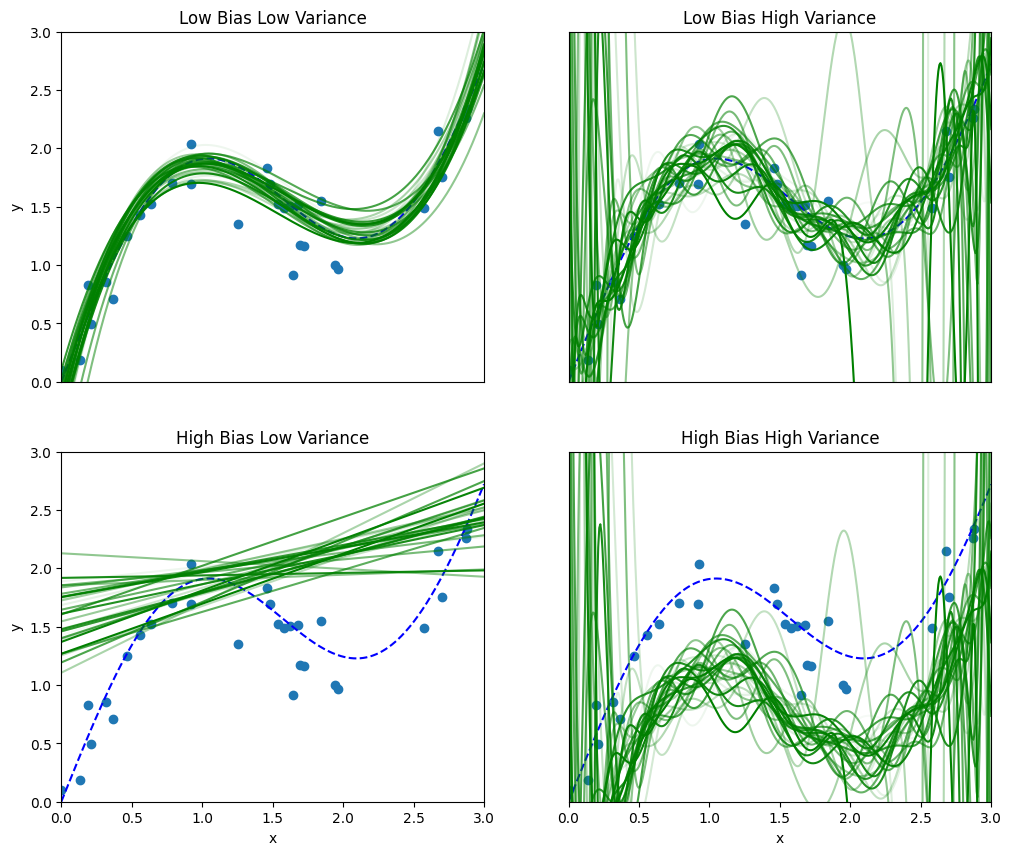

In [13]:
# Bias-Variance Trade-off

import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

np.random.seed(2137)

num_frames = 30

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
(ax1, ax2), (ax3, ax4) = axs

estimated_vals_low = []
estimated_vals_mid = []
estimated_vals_high = []

for i in range(num_frames):
    x = np.linspace(0, 3, 400)
    y = x + np.sin(2 * x)
    n = 30
    x_rand = np.random.uniform(0, 3, n)
    y_rand = x_rand + np.sin(2 * x_rand) + np.random.normal(0, 0.2, n)

    # Simple model
    degree_low = 1
    coefficients_low = np.polyfit(x_rand, y_rand, degree_low)
    estimated_y_low = np.polyval(coefficients_low, x)
    estimated_vals_low.append(estimated_y_low)

    # More complex one
    degree_mid = 3
    coefficients_mid = np.polyfit(x_rand, y_rand, degree_mid)
    estimated_y_mid = np.polyval(coefficients_mid, x)
    estimated_vals_mid.append(estimated_y_mid)

    # Overcomplicated model
    degree_high = 15
    coefficients_high = np.polyfit(x_rand, y_rand, degree_high)
    estimated_y_high = np.polyval(coefficients_high, x)
    estimated_vals_high.append(estimated_y_high)

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()

    ax1.set_xlim(0, 3)
    ax1.set_ylim(0, 3)
    ax2.set_xlim(0, 3)
    ax2.set_ylim(0, 3)
    ax3.set_xlim(0, 3)
    ax3.set_ylim(0, 3)
    ax4.set_xlim(0, 3)
    ax4.set_ylim(0, 3)

    ax1.plot(x, y, color='blue', linestyle='--')
    ax1.scatter(x_rand, y_rand)
    ax2.plot(x, y, color='blue', linestyle='--')
    ax2.scatter(x_rand, y_rand)
    ax3.plot(x, y, color='blue', linestyle='--')
    ax3.scatter(x_rand, y_rand)
    ax4.plot(x, y, color='blue', linestyle='--')
    ax4.scatter(x_rand, y_rand)

    ax1.set_title(f'Low Bias Low Variance')
    ax2.set_title(f'Low Bias High Variance')
    ax3.set_title(f'High Bias Low Variance')
    ax4.set_title(f'High Bias High Variance')

    ax1.set_xlabel('')
    ax1.set_ylabel('y')
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax4.set_xlabel('x')
    ax4.set_ylabel('')

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax4.set_yticks([])

    for j, estimated_y in enumerate(estimated_vals_mid):
        ax1.plot(x, estimated_y, color='green',
                 label=f'Degree {degree_high} Polynomial',
                 alpha=(j + 1) / (i + 1))

    for j, estimated_y in enumerate(estimated_vals_high):
        ax2.plot(x, estimated_y, color='green',
                 label=f'Degree {degree_high} Polynomial',
                 alpha=(j + 1) / (i + 1))

    for j, estimated_y in enumerate(estimated_vals_low):
        ax3.plot(x, estimated_y + 0.5, color='green',
                 label=f'Degree {degree_low} Polynomial',
                 alpha=(j + 1) / (i + 1))

    for j, estimated_y in enumerate(estimated_vals_high):
        ax4.plot(x, estimated_y - 0.8, color='green',
                 label=f'Degree {degree_high} Polynomial',
                 alpha=(j + 1) / (i + 1))

    plt.savefig(f'frame_{i}.png')

# Combine Frames into GIF
images = []
for i in range(num_frames):
    images.append(imageio.imread(f'frame_{i}.png'))

imageio.mimsave('animation.gif', images, duration=0.5)

# Clean Up
for i in range(num_frames):
    os.remove(f'frame_{i}.png')

In [ ]:
'''
Tree with max fitted depth of 4:
root ::: Split at variable 2 at 2.5999999999999996
  right ::: Split at variable 3 at 1.65 ([37 44])
   right.right ::: Split at variable 2 at 4.9 ([ 1 40])
    right.right.right ([34] and the leaf value is [2])
    right.right.left ([1 6] and the leaf value is [2])
   right.left ::: Split at variable 2 at 4.95 ([36  4])
    right.left.right ([1 4] and the leaf value is None)
     right.left.right.right ([3] and the leaf value is [2])
     right.left.right.left ([1 1] and the leaf value is [1 2])
    right.left.left ([35] and the leaf value is [1])
  left ([39] and the leaf value is [0])

Rough test: Prediction=0, True Value=0
'''


'''
Tree with max fitted depth of 5:
root ::: Split at variable 2 at 2.5999999999999996
  right ::: Split at variable 3 at 1.65 ([37 44])
   right.right ::: Split at variable 2 at 4.9 ([ 1 40])
    right.right.right ([34] and the leaf value is [2])
    right.right.left ::: Split at variable 1 at 3.1 ([1 6])
     right.right.left.right ([1] and the leaf value is [1])
     right.right.left.left ([6] and the leaf value is [2])
   right.left ::: Split at variable 2 at 4.95 ([36  4])
    right.left.right ([1 4] and the leaf value is None)
     right.left.right.right ([3] and the leaf value is [2])
     right.left.right.left ::: Split at variable 1 at 2.45 ([1 1])
      right.left.right.left.right ([1] and the leaf value is [1])
      right.left.right.left.left ([1] and the leaf value is [2])
    right.left.left ([35] and the leaf value is [1])
  left ([39] and the leaf value is [0])

Rough test: Prediction=0, True Value=0
'''